In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlin inline
import seaborn as sns

UsageError: Line magic function `%matplotlin` not found.


# Load Data

In [2]:
# Load the data
data = pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")  # Assuming the data is in a CSV file

# Basic Checks

In [3]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
data.tail()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


In [5]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [7]:
data.shape

(1453, 15)

# Statistical Mesures of data

In [8]:
data.describe() 

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [9]:
data.describe(include="O")

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,439,788


# Data processing

In [10]:
# First remove the special character from data
data = data.replace('[\+-.! I hate it lov]','',regex=True)
data.value_counts("Like")

Like
3    302
5    295
2    246
4    231
1    210
0    169
dtype: int64

In [11]:
# Check missing value
data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [13]:
# Handle Categorical data
# Instantiate the LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Iterate over columns and apply LabelEncoder to categorical columns
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])



In [14]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,3,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1


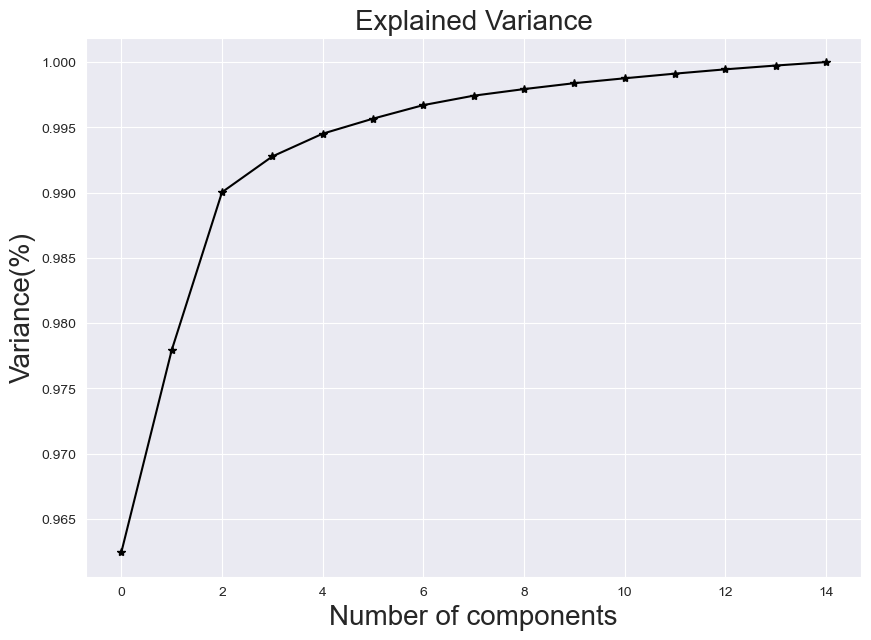

In [17]:
# Step:1 Getting optimal value of pca
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA() # Object creation
principlecomponents = pca.fit_transform(data) # Fitting the data
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='*',color='k') #plot the variance ratio
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20) # for each componant
plt.title('Explained Variance',fontsize=20)
plt.show()


In [18]:
# Step:2 Select the components
pca = PCA(n_components=10)
fifa = pca.fit_transform(data)

# Step:3 Make new dataframe
principle_df = pd.DataFrame(data=fifa,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10'])
principle_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,-16.414037,2.051859,-1.553941,0.290328,-0.207827,-0.261395,0.651720,-0.352028,-0.237266,-0.468229
1,-6.398734,2.624187,-0.672623,-0.246456,0.191927,-0.763440,-0.590572,-0.062358,-0.023910,-0.080306
2,-17.417613,3.039530,0.152593,0.299219,0.656649,-0.745981,-0.246676,0.943689,-0.388861,-0.600667
3,-24.365803,-1.996176,-0.559280,-0.326770,-0.408252,-0.690975,-0.910805,0.021570,0.648874,0.101155
4,-4.404555,0.021658,0.841985,0.207392,-0.643656,0.627993,-0.168871,0.671195,-0.738355,-0.255377


In [19]:
#Step:1 Define independant veriable
X = principle_df
X.head()


,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,-16.414037,2.051859,-1.553941,0.290328,-0.207827,-0.261395,0.651720,-0.352028,-0.237266,-0.468229
1,-6.398734,2.624187,-0.672623,-0.246456,0.191927,-0.763440,-0.590572,-0.062358,-0.023910,-0.080306
2,-17.417613,3.039530,0.152593,0.299219,0.656649,-0.745981,-0.246676,0.943689,-0.388861,-0.600667
3,-24.365803,-1.996176,-0.559280,-0.326770,-0.408252,-0.690975,-0.910805,0.021570,0.648874,0.101155
4,-4.404555,0.021658,0.841985,0.207392,-0.643656,0.627993,-0.168871,0.671195,-0.738355,-0.255377


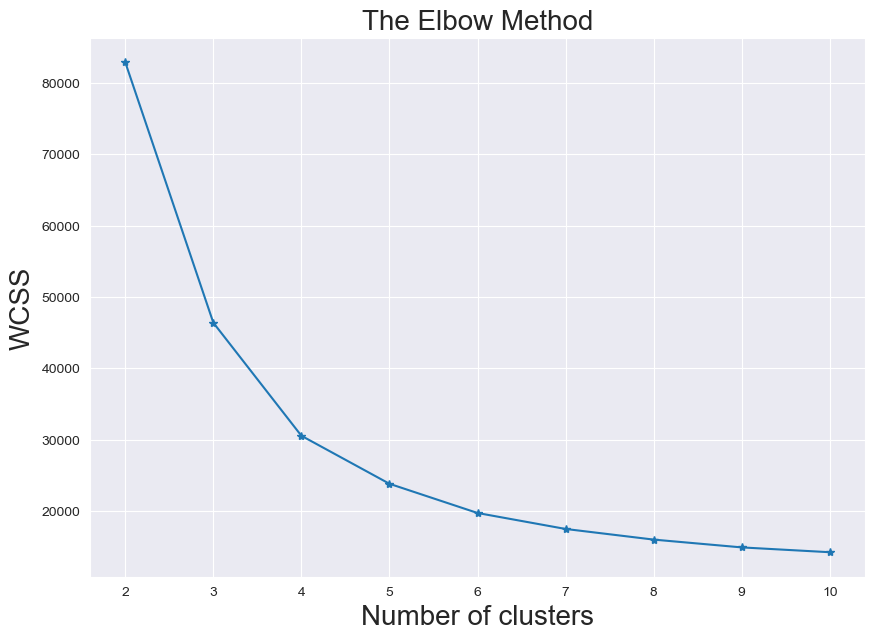

In [20]:
# Step:3 Initalize the k value
from sklearn.cluster import KMeans
kmeans = KMeans() # Object creation
wcss = [] # Create empty list

for i in range(2,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans = kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,7))
plt.plot(range(2,11),wcss,marker='*')
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('WCSS',fontsize=20)
plt.show()

In [21]:
# Step:3 initalize the cluster
kmeans = KMeans(n_clusters=4,random_state=45)

# Step:4 Fitting the data
kmeans.fit(X)

# Step:5  Get labels
kmeans.labels_

# Step:6 Print dataset with labels
principle_df['cluster'] = pd.DataFrame(kmeans.labels_)
principle_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,cluster
0,-16.414037,2.051859,-1.553941,0.290328,-0.207827,-0.261395,0.651720,-0.352028,-0.237266,-0.468229,0
1,-6.398734,2.624187,-0.672623,-0.246456,0.191927,-0.763440,-0.590572,-0.062358,-0.023910,-0.080306,2
2,-17.417613,3.039530,0.152593,0.299219,0.656649,-0.745981,-0.246676,0.943689,-0.388861,-0.600667,0
3,-24.365803,-1.996176,-0.559280,-0.326770,-0.408252,-0.690975,-0.910805,0.021570,0.648874,0.101155,0
4,-4.404555,0.021658,0.841985,0.207392,-0.643656,0.627993,-0.168871,0.671195,-0.738355,-0.255377,2


In [22]:
# Step:7 initalize the centroids
kmeans.cluster_centers_

array([[-1.83243242e+01, -9.10051786e-02, -1.10588457e-01,
        -5.13520989e-02, -4.08055121e-02, -1.39296604e-03,
        -7.10039502e-02, -7.62067151e-04, -2.42477079e-02,
         7.28276830e-03],
       [ 6.34301559e+00, -3.67927307e-02,  7.33171740e-02,
         3.78047051e-02,  8.33210477e-02,  1.43318264e-02,
         6.55316500e-02,  1.88636695e-02,  2.71918012e-02,
        -1.91810789e-03],
       [-7.34132434e+00,  1.28710330e-01,  9.71098607e-02,
         5.21217821e-02, -1.63784417e-02, -9.95137699e-03,
         5.34463135e-02, -2.46455827e-03,  1.55876624e-02,
        -1.45339785e-02],
       [ 1.94604260e+01, -1.27734924e-02, -9.10647463e-02,
        -5.51277624e-02, -4.15992604e-02, -4.53536197e-03,
        -7.07151793e-02, -1.95038756e-02, -2.69415063e-02,
         1.19476290e-02]])

In [23]:
# Step:8 Create a new veriable assign to labels
labels = kmeans.labels_
labels

# Step:9 import library to evaluate the model
from sklearn.metrics import silhouette_score
silhou_score = silhouette_score(X,labels)
print("Silhouette Score:",silhou_score)

Silhouette Score: 0.4530646027219503


C:\Users\akami\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


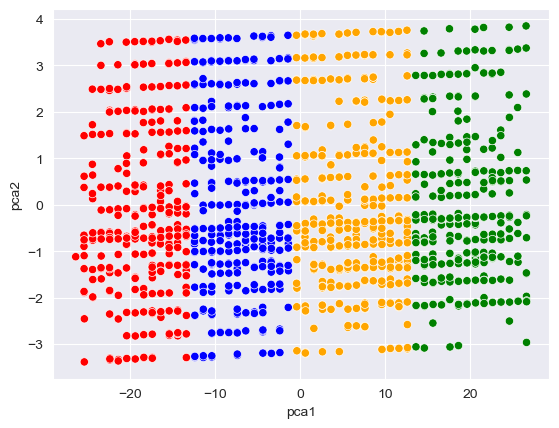

In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have performed KMeans clustering and have cluster labels
# kmeans_labels = ...

# Create your color array with unique colors corresponding to the number of clusters
color = np.array(['red', 'orange', 'blue', 'green'])  # Adjust colors as needed

# Make sure that your kmeans_labels are within the range of the color array indices
if np.max(labels) >= len(color):
    raise ValueError("Number of clusters exceeds the available colors")

# Create a scatter plot
sns.scatterplot(principle_df.pca1, principle_df.pca2, c=color[labels])
plt.show()




In [33]:
# Model saving using pickle
import pickle
file = open("kmeans_clustering_model.pkl","wb")
pickle.dump(kmeans,file)